In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from yellowbrick.features import Rank2D

# Loading in the Data:

In [2]:
#Load in the data
train = pd.read_csv('train.csv')

In [3]:
#Check how it looks
train.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,0,1,14984,1,0,1,2,50,1457,21


In [4]:
#We have a lot of data. We need to cut this down
train.shape

(37670293, 24)

In [5]:
#We have missing values in only three sections
train.isnull().sum()

date_time                           0
site_name                           0
posa_continent                      0
user_location_country               0
user_location_region                0
user_location_city                  0
orig_destination_distance    13525001
user_id                             0
is_mobile                           0
is_package                          0
channel                             0
srch_ci                         47083
srch_co                         47084
srch_adults_cnt                     0
srch_children_cnt                   0
srch_rm_cnt                         0
srch_destination_id                 0
srch_destination_type_id            0
is_booking                          0
cnt                                 0
hotel_continent                     0
hotel_country                       0
hotel_market                        0
hotel_cluster                       0
dtype: int64

In [6]:
#More of a look of what our data looks like
train.describe()

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
count,3.767029e+07,3.767029e+07,3.767029e+07,3.767029e+07,3.767029e+07,2.414529e+07,3.767029e+07,3.767029e+07,3.767029e+07,3.767029e+07,...,3.767029e+07,3.767029e+07,3.767029e+07,3.767029e+07,3.767029e+07,3.767029e+07,3.767029e+07,3.767029e+07,3.767029e+07,3.767029e+07
mean,9.795271e+00,2.680473e+00,8.610880e+01,3.084060e+02,2.775304e+04,1.970090e+03,6.044518e+05,1.349265e-01,2.489042e-01,5.870761e+00,...,3.321222e-01,1.112663e+00,1.444109e+04,2.582280e+00,7.965675e-02,1.483384e+00,3.156305e+00,8.129685e+01,6.004619e+02,4.980861e+01
std,1.196754e+01,7.480393e-01,5.924310e+01,2.084437e+02,1.678255e+04,2.232442e+03,3.506175e+05,3.416451e-01,4.323782e-01,3.717095e+00,...,7.314981e-01,4.591155e-01,1.106630e+04,2.153019e+00,2.707611e-01,1.219776e+00,1.623189e+00,5.617119e+01,5.117391e+02,2.891595e+01
min,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.600000e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.000000e+00,6.600000e+01,1.740000e+02,1.300900e+04,3.131670e+02,2.989100e+05,0.000000e+00,0.000000e+00,2.000000e+00,...,0.000000e+00,1.000000e+00,8.267000e+03,1.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,5.000000e+01,1.600000e+02,2.500000e+01
50%,2.000000e+00,3.000000e+00,6.600000e+01,3.140000e+02,2.765500e+04,1.140491e+03,6.039140e+05,0.000000e+00,0.000000e+00,9.000000e+00,...,0.000000e+00,1.000000e+00,9.147000e+03,1.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,5.000000e+01,5.930000e+02,4.900000e+01
75%,1.400000e+01,3.000000e+00,7.000000e+01,3.850000e+02,4.241300e+04,2.552599e+03,9.101680e+05,0.000000e+00,0.000000e+00,9.000000e+00,...,0.000000e+00,1.000000e+00,1.879000e+04,5.000000e+00,0.000000e+00,2.000000e+00,4.000000e+00,1.060000e+02,7.010000e+02,7.300000e+01
max,5.300000e+01,4.000000e+00,2.390000e+02,1.027000e+03,5.650800e+04,1.240790e+04,1.198785e+06,1.000000e+00,1.000000e+00,1.000000e+01,...,9.000000e+00,8.000000e+00,6.510700e+04,9.000000e+00,1.000000e+00,2.690000e+02,6.000000e+00,2.120000e+02,2.117000e+03,9.900000e+01


# Removing unwanted data (and reducing size of data for performance)

In [7]:
train2 = train[train.is_booking==1]

In [8]:
train2.drop(['date_time', 'is_booking', 'srch_ci', 'srch_co', 'orig_destination_distance'], axis=1, inplace=True)

C:\Users\David\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [9]:
train2=train2.sample(frac=0.1)
train2.shape

(300069, 19)

# Brief exploration of data sample. Counts of hotel clusters and correlation

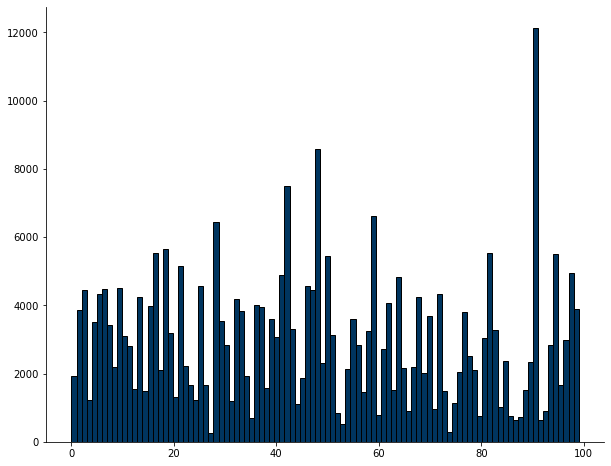

In [10]:
plt.figure(figsize=(10,8))
plt.hist(train2.hotel_cluster, bins=100, edgecolor='k', color='#00355f')
sns.despine(top=True, right=True)
plt.show()

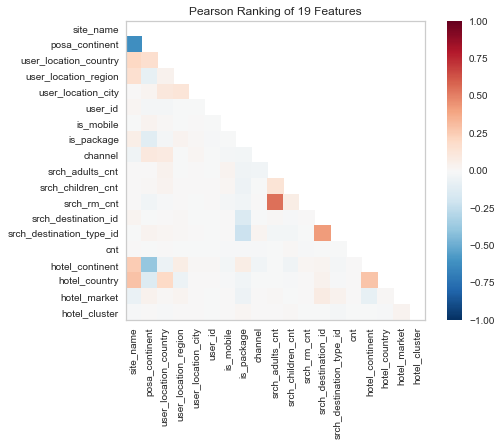

In [33]:
pearsons = ['site_name', 'posa_continent', 'user_location_country', 'user_location_region', 'user_location_city', 'user_id', 'is_mobile', 'is_package',
            'channel', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id', 'cnt','hotel_continent', 
            'hotel_country', 'hotel_market', 'hotel_cluster']
x = train2[pearsons].to_numpy()

visualizer = Rank2D(features=pearsons, algorithm='pearson')
visualizer.fit(x)
visualizer.transform(x)
visualizer.show() 

# Create our Random Forest Model

In [11]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [12]:
features = train2.drop('hotel_cluster', axis=1)
target = train2.hotel_cluster

features_train, features_test, target_train, target_test = train_test_split(features, target, 
                                                                            test_size=0.2, random_state=23)

In [13]:
from sklearn.ensemble import RandomForestClassifier

forestmodel = RandomForestClassifier(n_estimators=100)

In [14]:
forestmodel.fit(features_train, target_train)
predictions = forestmodel.predict(features_test)

# Check how well it performed

In [44]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print(f"Accuracy: {accuracy_score(predictions, target_test)*100:.2f}%")
print(f"Precision: {precision_score(predictions, target_test, average='macro')*100:.2f}%")
print(f"Recall: {recall_score(predictions, target_test, average='macro')*100:.2f}%")

Accuracy: 13.26%
Precision: 13.45%
Recall: 13.93%


In [35]:
matrix = confusion_matrix(predictions, target_test)
dataframe = pd.DataFrame(matrix)

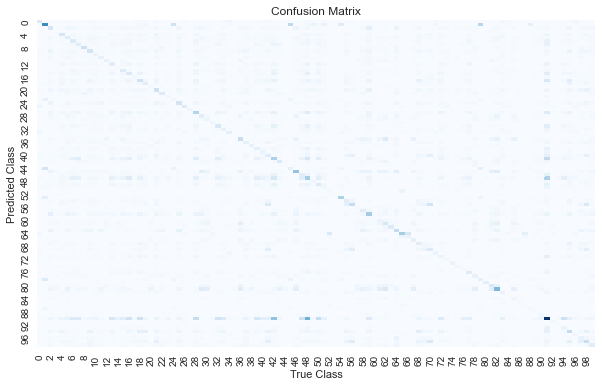

In [38]:
plt.figure(figsize=(10,6))
sns.heatmap(dataframe, cbar=None, cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Predicted Class')
plt.xlabel('True Class')
plt.show()

# Setting up our Neural Network

In [16]:
X = train2.drop('hotel_cluster', axis=1)
y = train2.hotel_cluster

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [17]:
from sklearn.neural_network import MLPClassifier

In [18]:
nn_mod = MLPClassifier(hidden_layer_sizes = [500,150], verbose = True)

In [19]:
nn_mod.fit(X_train, y_train)

Iteration 1, loss = 6.09533708
Iteration 2, loss = 4.44316753
Iteration 3, loss = 4.41834252
Iteration 4, loss = 4.41372014
Iteration 5, loss = 4.41282552
Iteration 6, loss = 4.41262604
Iteration 7, loss = 4.41260100
Iteration 8, loss = 4.41258005
Iteration 9, loss = 4.43932240
Iteration 10, loss = 4.41260677
Iteration 11, loss = 4.41258850
Iteration 12, loss = 4.41257905
Iteration 13, loss = 4.41258176
Iteration 14, loss = 4.41258612
Iteration 15, loss = 4.41256940
Iteration 16, loss = 4.41256535
Iteration 17, loss = 4.46342279
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=[500, 150], verbose=True)

In [20]:
predict = nn_mod.predict(X_test)

# See how we did

In [48]:
print(f"Accuracy: {accuracy_score(predict, y_test)*100:.2f}%")
print(f"Precision: {precision_score(predict, y_test, average='macro')*100:.2f}%")
print(f"Recall: {recall_score(predict, y_test, average='macro')*100:.2f}%")

Accuracy: 4.12%
Precision: 1.00%
Recall: 0.04%


In [46]:
print(classification_report(predict, y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          17       0.00    

C:\Users\David\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Summary:** Soooo, this didn't work so well. Or at all. My neural model literally picked the most populous cluster for every single choice. Which is exactly what we are trying to build the model to outperform. I'm not sure why but I feel like I did something wrong. I may try to meet up and talk about this assignment and figure out what I should be doing differently with this. Michael suggested some ideas for different features or scaling my data, but I feel like it'll be best to talk this one through and figure out what I am missing

# I want to make this because it should look funny

In [49]:
matrix = confusion_matrix(predict, y_test)
dataframe = pd.DataFrame(matrix)

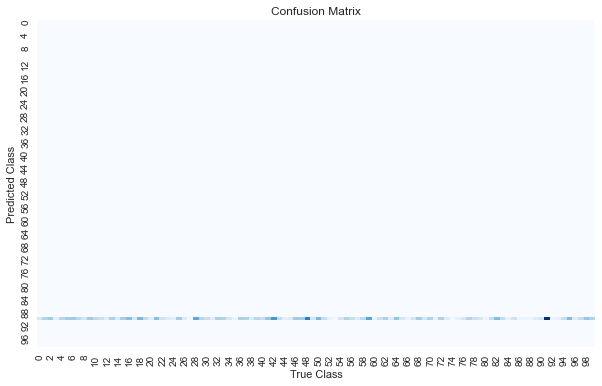

In [50]:
plt.figure(figsize=(10,6))
sns.heatmap(dataframe, cbar=None, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Predicted Class')
plt.xlabel('True Class')
plt.show()